# Ensemble Methods in Machine Learning

#### Introduction to Ensemble Methods

Ensemble methods are a foundational concept in machine learning, where multiple models (often referred to as 'base learners') are strategically combined to improve the robustness and accuracy of predictions. The core idea is that by combining the predictions from multiple models, one can often compensate for the weaknesses of individual models, resulting in better performance on complex datasets.

##### What Are Ensemble Methods?

At their core, ensemble methods leverage multiple learning algorithms to obtain better predictive performance than could be obtained from any of the constituent learning algorithms alone. They are typically divided into two main types:
1. **Averaging Methods (Bagging)**: These methods build several estimators independently and then average their predictions. The combined estimator is usually better than any single base estimator because its variance is reduced. Examples include Random Forest and Extra Trees.
2. **Boosting Methods**: These involve incremental building of models; each new model focuses on correcting errors made by previous models. Boosting has been shown to improve robustness and accuracy, albeit sometimes at the cost of increased computational complexity. Examples include AdaBoost and Gradient Boosting.

##### Purpose of Ensemble Methods

The main reasons to use ensemble methods include:
- **Improving prediction accuracy**: By combining several models, ensembles reduce the risk of choosing a single poor model or overfitting to the training data.
- **Enhancing generalization**: Ensemble methods merge the strengths of multiple learners, thus often achieving more reliable and robust predictions on unseen data.
- **Dealing with imbalanced datasets**: Ensembles can be particularly effective on datasets where classes are imbalanced.

##### When to Use Ensemble Methods

Ensemble methods are particularly beneficial when:
- There is significant variance in individual model performance.
- Overfitting is a concern with complex models.
- High accuracy is critical, and the computational cost is justifiable by the gains in performance.

In this notebook, we will explore various ensemble techniques applied to the UCI Wine Quality dataset, aiming to predict wine quality based on physicochemical tests. We will demonstrate how different ensemble strategies can be implemented and compare their performance.


#### Data Exploration and Preparation

Before applying any machine learning models, it's crucial to understand and preprocess the data. This section will cover the initial exploration of the dataset, check for missing values, and perform any necessary data cleaning and transformation steps.


In [2]:
import pandas as pd

# URL to the Wine Quality dataset (Red Wine)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

# Load the dataset
df = pd.read_csv(url, sep=';')  #We specify the separator of the csv file ;

# Display the first five rows of the DataFrame
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#### Data Exploration and Preparation

Before applying any machine learning models, it's crucial to understand and preprocess the data. This section will cover the initial exploration of the dataset, check for missing values, and perform any necessary data cleaning and transformation steps.


In [4]:
# Check for missing values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
# Describe the dataset to get an overview of the statistical summaries
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Include visualizations to explore relationships between features and the target variable, quality. Visualizations such as histograms, box plots, and scatter plots can be useful here.

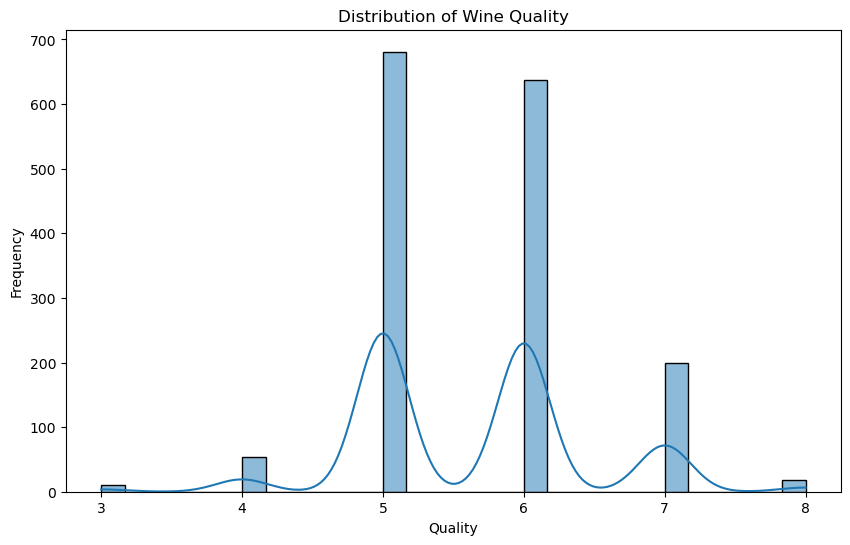

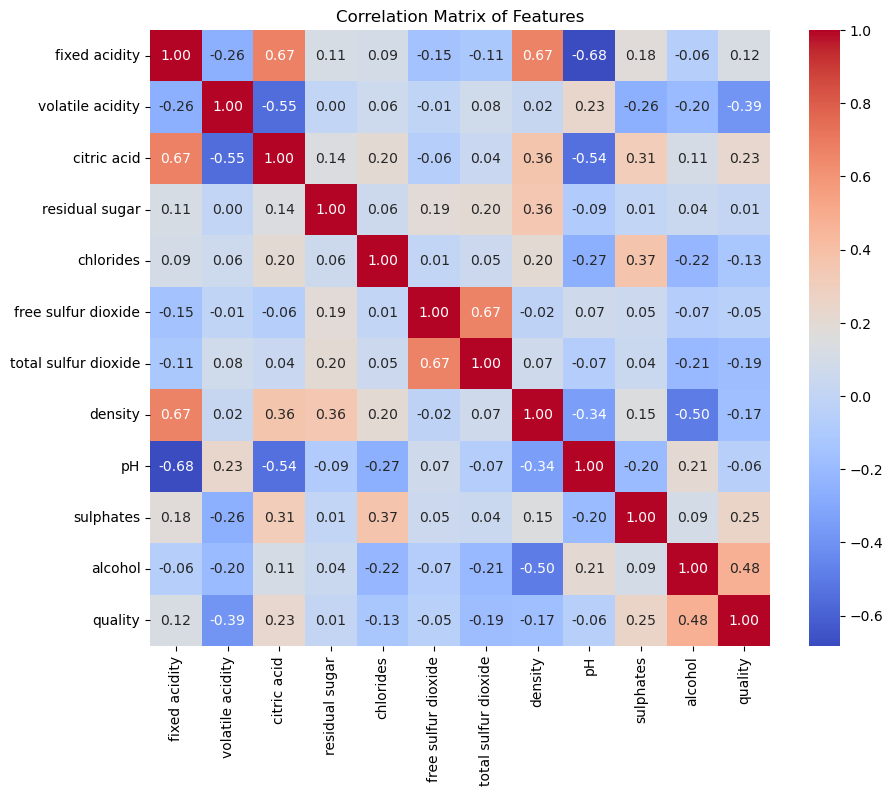

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of the quality scores
plt.figure(figsize=(10, 6))
sns.histplot(df['quality'], kde=True)
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.show()

# Correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()


# Splitting the Data for Training and Testing
from sklearn.model_selection import train_test_split

In [15]:
# Split the dataset into features and target
X = df.drop('quality', axis=1)
y = df['quality']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Modeling with Ensemble Methods

In this section, we will apply different ensemble methods to predict the wine quality. We will explore Bagging, Boosting, and Stacking methods and implement each using libraries like scikit-learn.


#### Bagging Implementation

We use Bagging with decision trees as the base learners. This method trains each base learner on a random subset of the training data and then aggregates their predictions.


In [18]:
#In this cell we'll demonstrate the Bagging Classifier using the Wine Quality dataset.
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Instantiate a Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)

# Instantiate a Bagging Classifier
bagging_clf = BaggingClassifier(estimator=dt, n_estimators=500, random_state=42)

# Train the Bagging Classifier
bagging_clf.fit(X_train, y_train)

# Predict the target values
y_pred_bagging = bagging_clf.predict(X_test)

from sklearn.metrics import accuracy_score

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred_bagging)
print(f'Bagging Model Accuracy: {accuracy:.2f}')

# Classification Report
from sklearn.metrics import classification_report

# Display the classification report
print(classification_report(y_test, y_pred_bagging, zero_division=1)) #We set zero_division=1 to avoid division by zero errors



Bagging Model Accuracy: 0.63
              precision    recall  f1-score   support

           3       1.00      0.00      0.00         1
           4       1.00      0.00      0.00        10
           5       0.71      0.74      0.72       130
           6       0.59      0.67      0.63       132
           7       0.56      0.45      0.50        42
           8       0.00      0.00      1.00         5

    accuracy                           0.63       320
   macro avg       0.64      0.31      0.47       320
weighted avg       0.64      0.63      0.63       320



#### Random Forests Implementation

Random Forests build upon the idea of bagging, adding feature randomness to the selection of the attributes used to make splits when constructing the trees.


In [24]:
# In this cell we'll demonstrate the Random Forest Classifier using the Wine Quality dataset.
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf.fit(X_train, y_train)
y_pred_forest = forest_clf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_forest))
print("Classification Report:\n", classification_report(y_test, y_pred_forest, zero_division=1))



Random Forest Accuracy: 0.659375
Classification Report:
               precision    recall  f1-score   support

           3       1.00      0.00      0.00         1
           4       0.00      0.00      1.00        10
           5       0.72      0.75      0.73       130
           6       0.63      0.69      0.66       132
           7       0.63      0.52      0.57        42
           8       0.00      0.00      1.00         5

    accuracy                           0.66       320
   macro avg       0.50      0.33      0.66       320
weighted avg       0.64      0.66      0.69       320



#### Hard Voting Classifier

A hard voting classifier aggregates the predictions of multiple classifiers and predicts the final output class based on the majority vote of these classifiers. Each classifier in the ensemble votes for a class, and the class receiving the most votes is chosen as the prediction. This technique is simple yet effective, especially when combining good predictors that make very different types of errors.

#### Integrating Bagging and Random Forests in a Hard Voting Classifier

In this section, we utilize a hard voting ensemble that includes both Bagging and Random Forest classifiers, along with a Logistic Regression model to introduce a different learning strategy. Hard voting works by taking the majority vote from all classifiers' predictions for the final output. This method benefits from the variance reduction of Bagging and the additional randomness in feature selection provided by Random Forests, while Logistic Regression offers a linear decision boundary, making the ensemble more diverse and robust.



In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Define a Logistic Regression classifier within a pipeline that includes scaling
log_clf = make_pipeline(StandardScaler(), LogisticRegression(random_state=42, max_iter=1000))

# Create the hard voting classifier, combining Logistic Regression with your Bagging and Random Forest classifiers
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('bag', bagging_clf), ('rf', forest_clf)],
    voting='hard')

# Training the voting classifier using the same training data
voting_clf.fit(X_train, y_train)

# Predicting with the voting classifier
y_pred_voting = voting_clf.predict(X_test)

# Evaluate the voting classifier
print("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred_voting))
print("Classification Report:\n", classification_report(y_test, y_pred_voting, zero_division=1))


Voting Classifier Accuracy: 0.64375
Classification Report:
               precision    recall  f1-score   support

           3       1.00      0.00      0.00         1
           4       1.00      0.00      0.00        10
           5       0.71      0.75      0.73       130
           6       0.61      0.67      0.64       132
           7       0.56      0.45      0.50        42
           8       0.00      0.00      1.00         5

    accuracy                           0.64       320
   macro avg       0.65      0.31      0.48       320
weighted avg       0.65      0.64      0.64       320



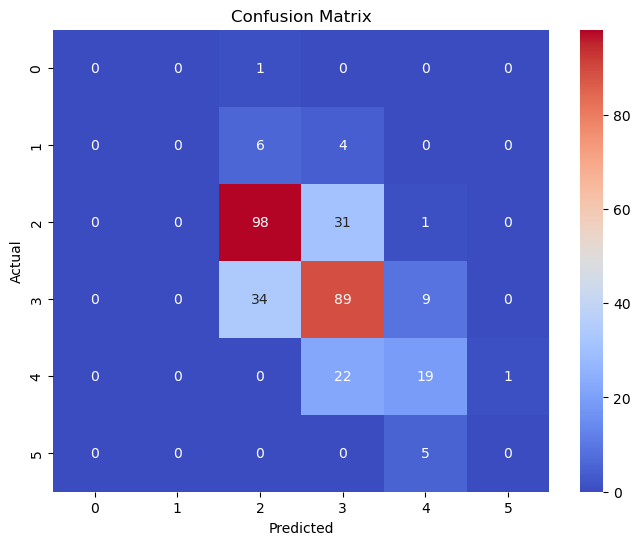

In [30]:
#Let's print the confusion matrix for the voting classifier
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix_df = pd.DataFrame(conf_matrix, index=range(conf_matrix.shape[0]), columns=range(conf_matrix.shape[1]))

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



We can now show the feature importance of the decision tree used:

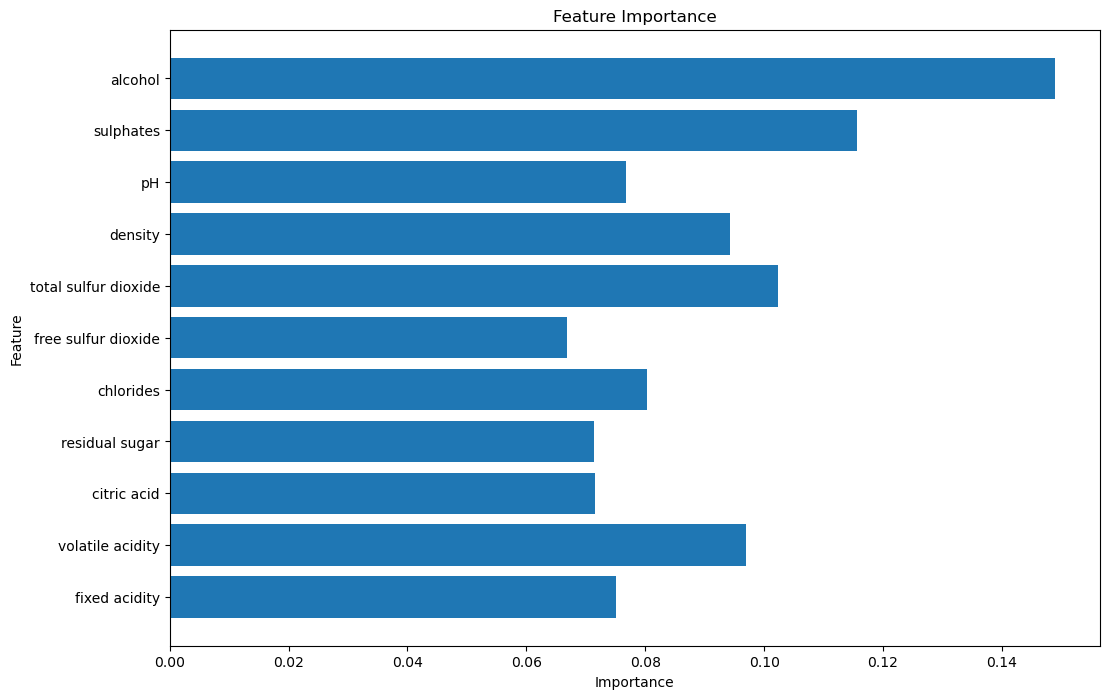

In [33]:
feature_importances = forest_clf.feature_importances_
features = df.columns[:-1]  # Assuming the last column is the target

plt.figure(figsize=(12, 8))
plt.barh(features, feature_importances)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()


#### Conclusion 

Throughout this notebook, we explored the application of various ensemble methods, including Bagging, Random Forests, and a Hard Voting Classifier combining multiple models. These methods demonstrated how combining different models can enhance prediction accuracy and robustness compared to using a single model approach.

By continuing to refine these models and exploring new ensemble strategies, we can further enhance our understanding and prediction of wine quality, contributing to better decision-making in wine production and quality assessment.

Thank you for following along with this analysis! Feel free to experiment with the code, tweak the parameters, and try out your own hypotheses to explore the fascinating world of machine learning ensembles.
